# Day 22

### Outlier Detection

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("Dataset/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
cat_cols = df.select_dtypes(include=['object'])
print("Categorical Columns : ",cat_cols.columns.tolist())
cat_cols

Categorical Columns :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [74]:
num_cols = df.select_dtypes(include=['number'])
print("Numerical Columns : ",num_cols.columns.tolist())
num_cols

Numerical Columns :  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


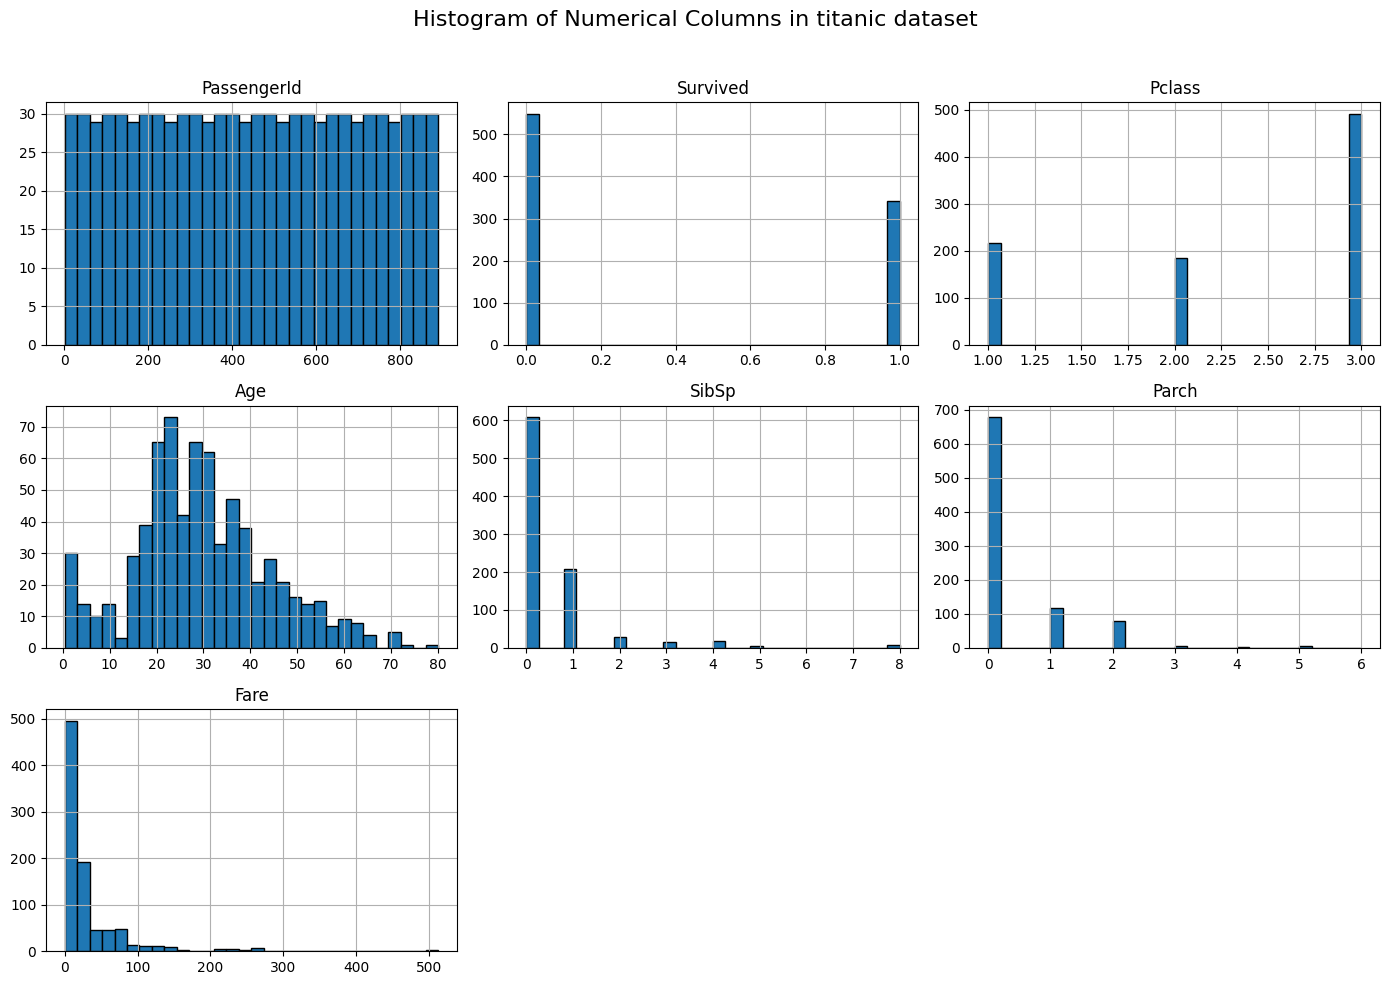

In [75]:
num_cols.hist(bins = 30,figsize=(14,10),edgecolor='black')
plt.suptitle("Histogram of Numerical Columns in titanic dataset",fontsize = 16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

### Outlier detection in Age column

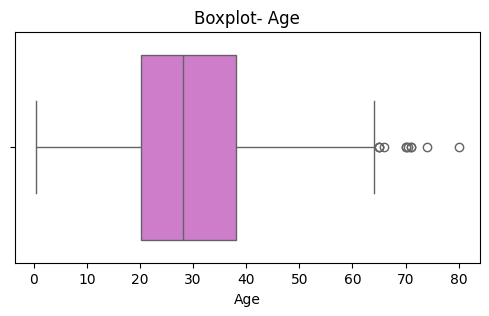

In [76]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Age'],color='orchid')
plt.title('Boxplot- Age')
plt.xlabel("Age")
plt.show()

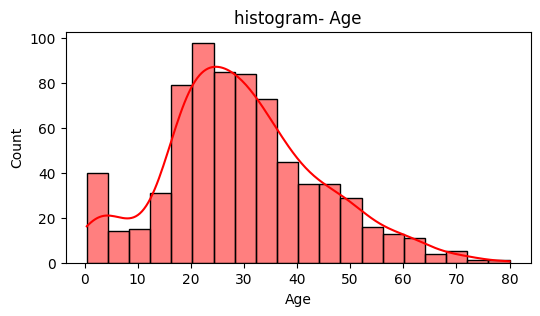

In [77]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['Age'],kde=True,color='red')
plt.title('histogram- Age')
plt.xlabel("Age")
plt.show()

### Finding mean and standard deviation of age

In [78]:
print("Mean of Age : ",df['Age'].mean())
print("Standard Deviation of Age : ",df['Age'].std())

Mean of Age :  29.69911764705882
Standard Deviation of Age :  14.526497332334042


### Setting boundary 

In [79]:
upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()
print("Lower boundary : ",lower_boundary)
print("Upper boundary : ",upper_boundary)

Lower boundary :  -13.880374349943303
Upper boundary :  73.27860964406094


### Outlier detection in fare column

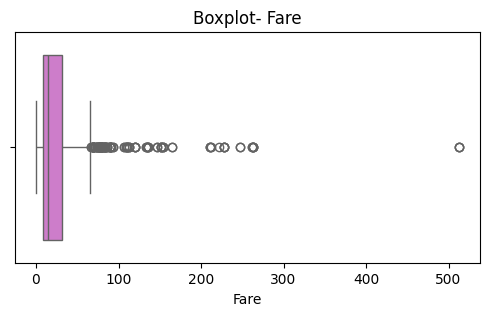

In [80]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Fare'],color='orchid')
plt.title('Boxplot- Fare')
plt.xlabel("Fare")
plt.show()

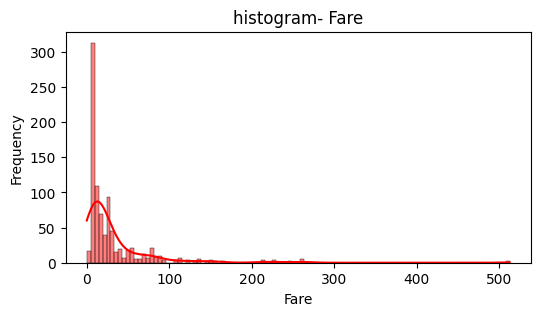

In [81]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['Fare'],kde=True,color='red')
plt.title('histogram- Fare')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

### Calculating IQR

In [82]:
IQR = df['Fare'].quantile(0.75)-df["Fare"].quantile(0.25)
IQR

np.float64(23.0896)

### Calculating The Boundaries 

In [83]:
lower_fence = df['Fare'].quantile(0.25)-(1.5*IQR)
upper_fence = df['Fare'].quantile(0.75)+(1.5*IQR)
print("Lower Boundary : ",lower_fence)
print("Upper Boundary : ",upper_fence)

Lower Boundary :  -26.724
Upper Boundary :  65.6344


In [84]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Calculating extreme boundaries

In [85]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
print("Lower Boundary : ",lower_bridge)
print("Upper Boundary : ",upper_bridge)

Lower Boundary :  -61.358399999999996
Upper Boundary :  100.2688


### HANDLING OUTLIER
- Z - score method (z= ((x-mean)/std))

In [92]:
from scipy.stats import zscore

print("Sum of missing Fare values : ",df['Fare'].isnull().sum())
#Drop missing Fare values
df1 = df[['Fare']].dropna()
print("Drop missing Fare values")
print(df1.shape)

#Calculate z-scores
df1['Fare_z'] = zscore(df1['Fare'])
print("Calculate z-scores: \n",df1['Fare_z'])

#filter out outliers(z-scores beyond +3 or - 3)
df_filtered = df1[(df1['Fare_z']>= -3) & (df1['Fare_z']<=3)]

df_filtered

Sum of missing Fare values :  0
Drop missing Fare values
(891, 1)
Calculate z-scores: 
 0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare_z, Length: 891, dtype: float64


,Fare,Fare_z
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337
...,...,...
886,13.0000,-0.386671
887,30.0000,-0.044381
888,23.4500,-0.176263
889,30.0000,-0.044381


In [125]:
#df1['Fare'].head(40)

In [126]:
#df1['Fare_z'].head(40)

In [95]:
df1.columns

Index(['Fare', 'Fare_z'], dtype='object')

In [96]:
df_filtered.columns

Index(['Fare', 'Fare_z'], dtype='object')

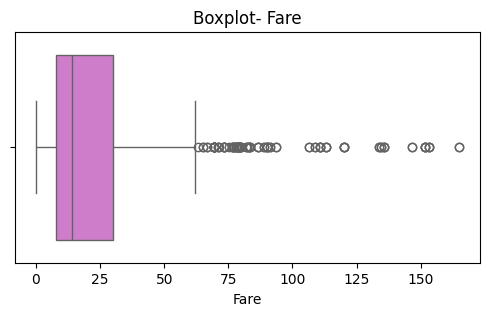

In [101]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df_filtered['Fare'],color='orchid')
plt.title('Boxplot- Fare')
plt.xlabel("Fare")
plt.show()

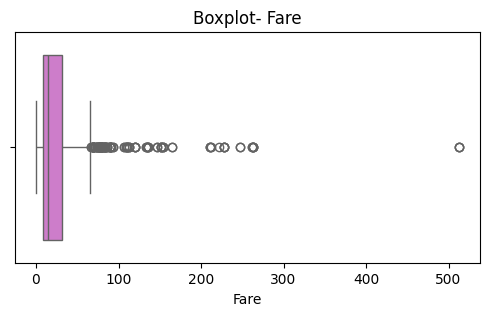

In [98]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df1['Fare'],color='orchid')
plt.title('Boxplot- Fare')
plt.xlabel("Fare")
plt.show()

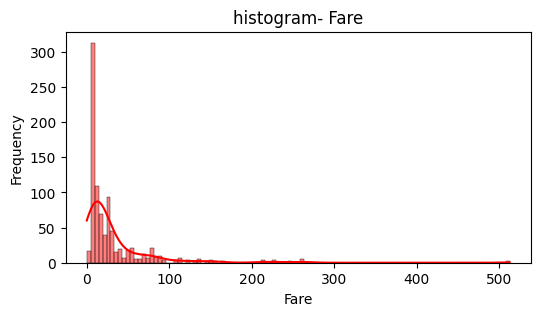

In [99]:
plt.figure(figsize=(6,3))
sns.histplot(x=df1['Fare'],kde=True,color='red')
plt.title('histogram- Fare')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

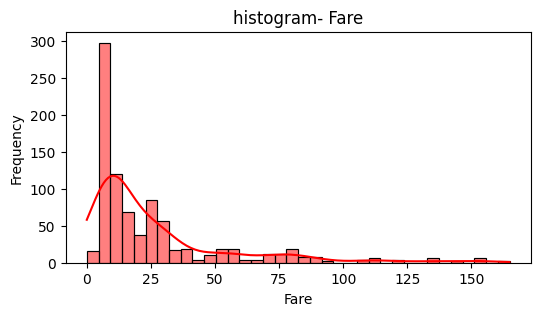

In [100]:
plt.figure(figsize=(6,3))
sns.histplot(x=df_filtered['Fare'],kde=True,color='red')
plt.title('histogram- Fare')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

Another method 
- IQR

In [113]:
Q1 = df['Fare'].quantile(0.25)
Q3= df['Fare'].quantile(0.75)
Iqr = Q3 - Q1

#calculate bounds
lower_bound = Q1 - 3 * Iqr
upper_bound = Q3 + 3* Iqr
print(df.shape)
df_filter = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
df_filter

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


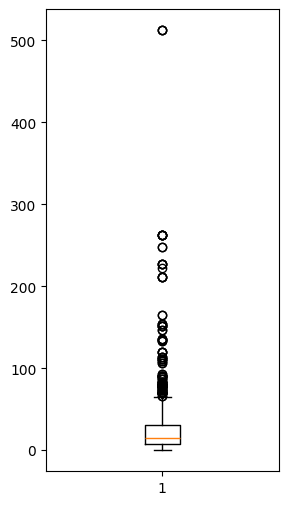

In [114]:
plt.figure(figsize=(3,6))
plt.boxplot(df['Fare'])
plt.show()


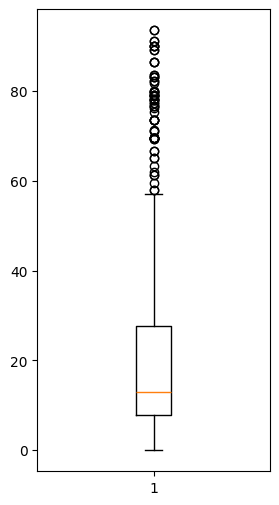

In [115]:
plt.figure(figsize=(3,6))
plt.boxplot(df_filter['Fare'])
plt.show()

### Imputaion method

In [ ]:
median_fare = df_filter['Fare'].median()
print("Median : ",median_fare)
df['Fare_replaced']=df['Fare'].apply(lambda x: median_fare if x > upper_bound else x)
df

13.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.0000


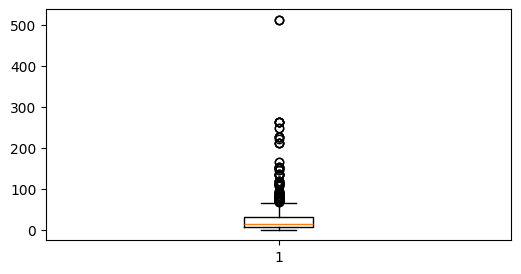

In [119]:
plt.figure(figsize=(6,3))
plt.boxplot(df['Fare'])
plt.show()

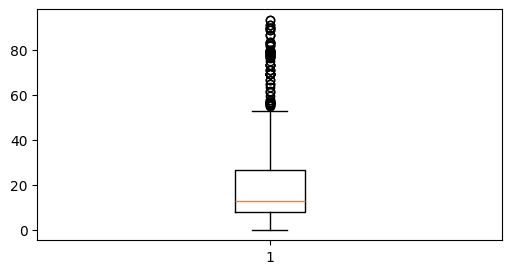

In [118]:
plt.figure(figsize=(6,3))
plt.boxplot(df['Fare_replaced'])
plt.show()

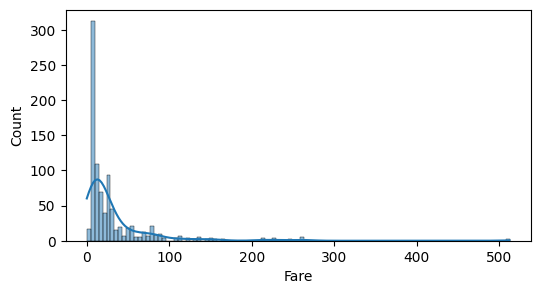

In [123]:
plt.figure(figsize=(6,3))
sns.histplot(df['Fare'], kde=True)
plt.show()

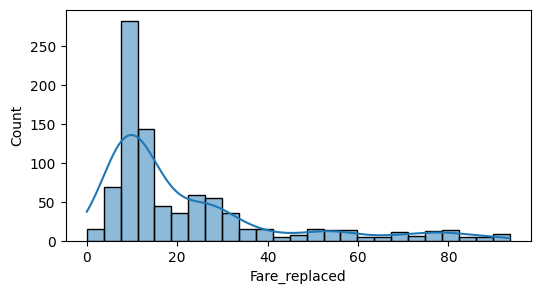

In [124]:
plt.figure(figsize=(6,3))
sns.histplot(df['Fare_replaced'], kde=True)
plt.show()